# <h1><center>Diabetic Retinopathy Detection</center></h1>
<h2><center>Detect diabetic retinopathy to stop blindness before it's too late</center></h2>
<center><img src="https://raw.githubusercontent.com/dimitreOliveira/MachineLearning/master/Kaggle/APTOS%202019%20Blindness%20Detection/aux_img.png"></center>

In this synchronous Kernels-only competition, you'll build a machine learning model to speed up disease detection. You’ll work with thousands of images collected in rural areas to help identify diabetic retinopathy automatically. If successful, you will not only help to prevent lifelong blindness, but these models may be used to detect other sorts of diseases in the future, like glaucoma and macular degeneration.
In this project, I will be using basic deep learning and machine learning.



In [ ]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras import optimizers, applications
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense,MaxPooling2D, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional
%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras import utils as np_utils



In [ ]:
df_train=pd.read_csv("C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/train.csv",skiprows=[1,])
df_test=pd.read_csv("C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/test.csv",skiprows=[1,])

print(df_train)
print(df_test)

           id_code  diagnosis
0     001639a390f0          4
1     0024cdab0c1e          1
2     002c21358ce6          0
3     005b95c28852          0
4     0083ee8054ee          4
...            ...        ...
3656  ffa47f6a7bf4          2
3657  ffc04fed30e6          0
3658  ffcf7b45f213          2
3659  ffd97f8cd5aa          0
3660  ffec9a18a3ce          2

[3661 rows x 2 columns]
           id_code
0     003f0afdcd15
1     006efc72b638
2     00836aaacf06
3     009245722fa4
4     009c019a7309
...            ...
1922  ff2fd94448de
1923  ff4c945d9b17
1924  ff64897ac0d8
1925  ffa73465b705
1926  ffdc2152d455

[1927 rows x 1 columns]


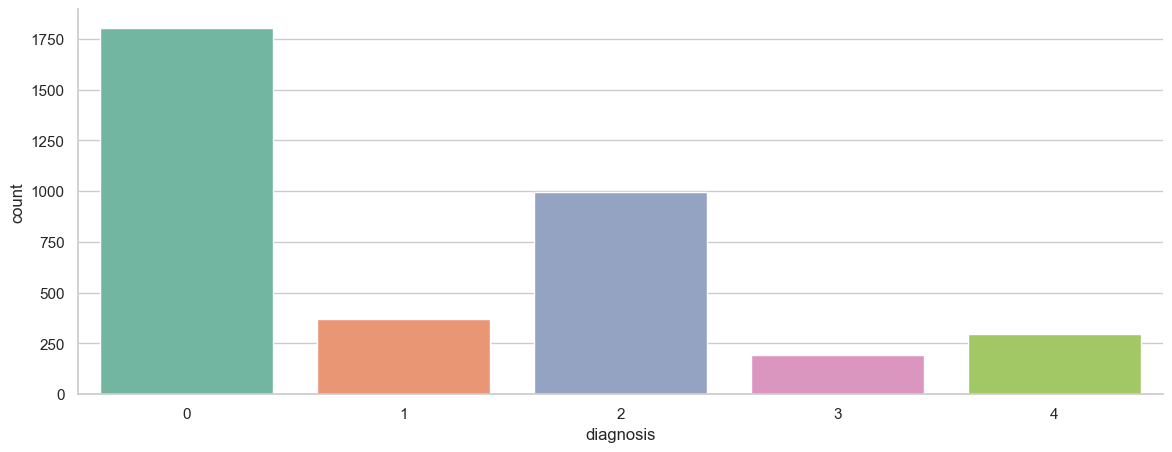

In [ ]:
f, ax = plt.subplots(figsize=(14, 5))
ax = sns.countplot(x="diagnosis", data=df_train, palette="Set2")
sns.despine()
plt.show()

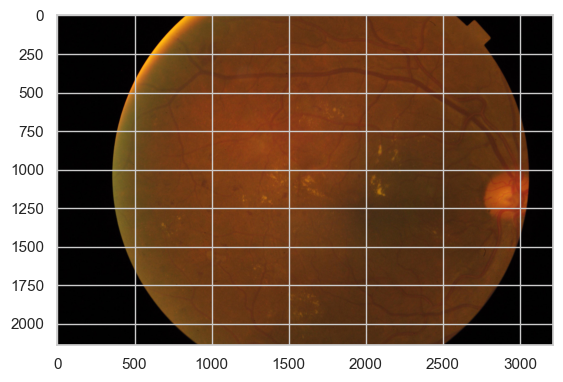

In [ ]:
imgPath=f"C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/train_images/000c1434d8d7.png"
img=cv2.imread(imgPath)
accu2=90
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

(2136, 3216)


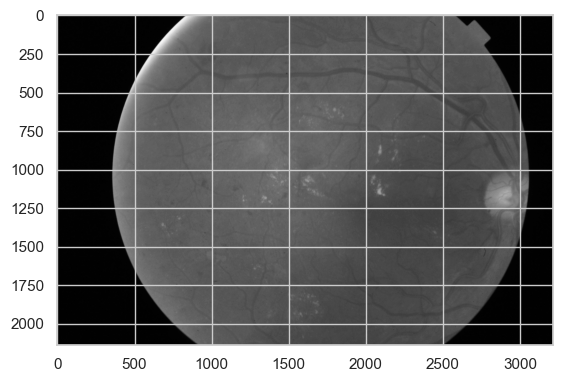

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()
print(img)

(2136, 3216)
(2135, 2707)


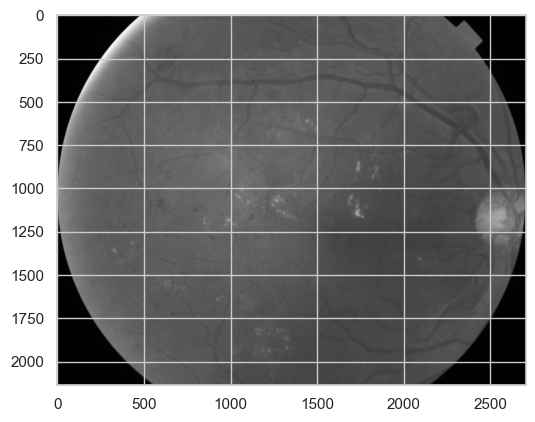

In [ ]:
def getEyeArea(image):
    print(image.shape)
    left = 0
    right = image.shape[1] - 1
    top = 0
    bottom = image.shape[0] - 1

    for i in range(0, image.shape[1], 1):
        for j in range(0, image.shape[0], 1):
            if image[j][i] > 10:
                left = i
                break
        else:
             continue
        break

    #print(left)


    for i in range(image.shape[1]-1, 0, -1):
        for j in range(0, image.shape[0], 1):
            if image[j][i] > 10:
                right = i
                break
        else:
             continue
        break

    #print(right)


    for j in range(0, image.shape[0], 1):
        for i in range(0, image.shape[1], 1):
            if image[j][i] > 10:
                top = j
                break
        else:
             continue
        break

    #print(top)


    for j in range(image.shape[0]-1, 0, -1):
        for i in range(0, image.shape[1], 1):
            if image[j][i] > 10:
                bottom = j
                break
        else:
             continue
        break

    #print(bottom)

    return left, right, top, bottom

left, right, top, bottom = getEyeArea(img)
img_cut = img[top:bottom,left:right]
print(img_cut.shape)
plt.imshow(img_cut,cmap='gray')
plt.show()

(224, 224)


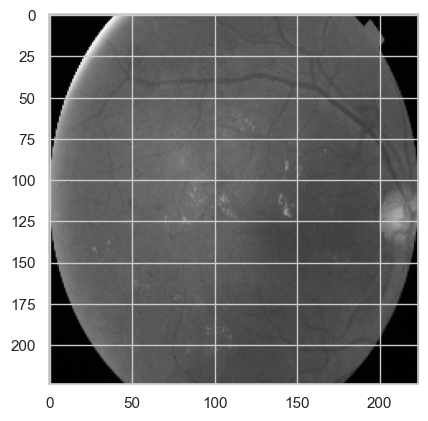

In [ ]:
resize_num_test = 224
img_resize = cv2.resize(img_cut, dsize=(resize_num_test, resize_num_test))
print(img_resize.shape)
plt.imshow(img_resize,cmap='gray')
plt.show()

# Alexnet

In [ ]:
def alex_net():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))

    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))

    # 3rd Fully Connected Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(5, activation = 'sigmoid'))
#     model.add(Activation('softmax'))
    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath="C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Alexnet/Alexnet-{epoch:02d}--{accuracy:-4f}.hdf5"
checkpoint=ModelCheckpoint(
filepath=model_filepath,
monitor='accuracy',
mode='max',
save_best_only=True,
verbose=1
)

In [ ]:
base_model1 = alex_net()

In [ ]:
df_train["id_code"] = df_train["id_code"].apply(lambda x: x + ".png")
df_test["id_code"] = df_test["id_code"].apply(lambda x: x + ".png")
df_train['diagnosis'] = df_train['diagnosis'].astype('str')
df_train.head()

,id_code,diagnosis
0,001639a390f0.png,4
1,0024cdab0c1e.png,1
2,002c21358ce6.png,0
3,005b95c28852.png,0
4,0083ee8054ee.png,4


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2,
                                 horizontal_flip=True)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory="C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=16,
    class_mode="categorical",
    target_size=(224, 224),
    subset='training')

Found 2929 validated image filenames belonging to 5 classes.


In [ ]:
valid_generator=train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory="C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=16,
    class_mode="categorical",
    target_size=(224, 224),
    subset='validation')

Found 732 validated image filenames belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory = "C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/test_images/",
        x_col="id_code",
        target_size=(224, 224),
        batch_size=16,
        shuffle=False,
        class_mode=None)

Found 1927 validated image filenames.


In [ ]:
base_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [ ]:
history1=base_model1.fit(
train_generator,
validation_data=valid_generator,epochs=50,callbacks=[checkpoint])

Epoch 1/50
184/184 [==============================] - ETA: 0s - loss: 1.0923 - accuracy: 0.6166
Epoch 1: accuracy improved from -inf to 0.61659, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Alexnet\Alexnet-01--0.616593.hdf5
184/184 [==============================] - 394s 2s/step - loss: 1.0923 - accuracy: 0.6166 - val_loss: 0.9709 - val_accuracy: 0.6626
Epoch 2/50
184/184 [==============================] - ETA: 0s - loss: 0.8744 - accuracy: 0.6955
Epoch 2: accuracy improved from 0.61659 to 0.69546, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Alexnet\Alexnet-02--0.695459.hdf5
184/184 [==============================] - 347s 2s/step - loss: 0.8744 - accuracy: 0.6955 - val_loss: 0.8369 - val_accuracy: 0.6967
Epoch 3/50
184/184 [==============================] - ETA: 0s - loss: 0.8345 - accuracy: 0.7071
Epoch 3: accuracy improved from 0.69546 to 0.70707, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Alexnet\Alexnet-0

Epoch 28/50
184/184 [==============================] - ETA: 0s - loss: 0.7891 - accuracy: 0.7166
Epoch 28: accuracy did not improve from 0.71731
184/184 [==============================] - 338s 2s/step - loss: 0.7891 - accuracy: 0.7166 - val_loss: 0.8039 - val_accuracy: 0.6858
Epoch 29/50
184/184 [==============================] - ETA: 0s - loss: 0.7853 - accuracy: 0.7105
Epoch 29: accuracy did not improve from 0.71731
184/184 [==============================] - 337s 2s/step - loss: 0.7853 - accuracy: 0.7105 - val_loss: 0.8382 - val_accuracy: 0.6844
Epoch 30/50
184/184 [==============================] - ETA: 0s - loss: 0.7713 - accuracy: 0.7081
Epoch 30: accuracy did not improve from 0.71731
184/184 [==============================] - 338s 2s/step - loss: 0.7713 - accuracy: 0.7081 - val_loss: 0.7690 - val_accuracy: 0.6926
Epoch 31/50
184/184 [==============================] - ETA: 0s - loss: 0.7621 - accuracy: 0.7187
Epoch 31: accuracy improved from 0.71731 to 0.71868, saving model to C:/

In [ ]:
history1.history

{'loss': [1.0922900438308716,
  0.8744415640830994,
  0.8345205783843994,
  1.024277687072754,
  0.8527097105979919,
  0.8311143517494202,
  0.82469242811203,
  1.1695852279663086,
  0.8318252563476562,
  0.7996723055839539,
  0.8074236512184143,
  0.7920771241188049,
  0.7993340492248535,
  0.7866920828819275,
  0.8950531482696533,
  0.7909112572669983,
  0.8512172698974609,
  0.7928658723831177,
  0.7981090545654297,
  0.7841161489486694,
  0.7758508920669556,
  0.7740599513053894,
  0.7656728625297546,
  0.7703147530555725,
  0.8079782128334045,
  0.7674978375434875,
  0.7577467560768127,
  0.7890617251396179,
  0.7852512001991272,
  0.7713303565979004,
  0.7620710730552673,
  0.7598413228988647,
  0.7644509673118591,
  0.7680022120475769,
  0.7500602006912231,
  0.7915233969688416,
  0.8406938910484314,
  0.7654028534889221,
  0.7613700032234192,
  0.7436946034431458,
  0.7403764724731445,
  0.7435058355331421,
  0.7372802495956421,
  0.7275940179824829,
  0.7158970236778259,
  0.7

In [ ]:
# Function to plot the performance metrics
def plot_result(hist):
    plt.figure(figsize=(10, 7));
    plt.suptitle(f"Performance Metrics", fontsize=20)

    # Actual and validation losses
    plt.subplot(2, 2, 1);
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.title('Train and validation loss curve')
    plt.legend()

    # Actual and validation accuracy
    plt.subplot(2, 2, 2);
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='validation')
    plt.title('Training and validation accuracy curve')
    plt.legend()



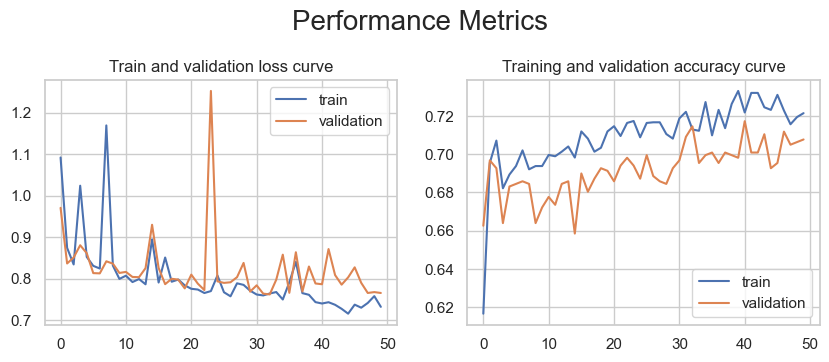

In [ ]:
plot_result(history1)

# Resnet

In [ ]:
def resnet50():
    base_model = tf.keras.applications.ResNet50(include_top=False,
                                            weights="imagenet",
                                            input_shape=(224,224,3))
    x = base_model.output
    batch_normal = BatchNormalization()(x)
    global_avg_pooling = GlobalAveragePooling2D()(batch_normal)
    drop_out = Dropout(0.5)(global_avg_pooling)
    dense1 = Dense(1024, activation='relu')(drop_out)
    dense2 = Dense(5, activation = 'sigmoid')(dense1)
    model = Model(inputs = base_model.input, outputs = dense2)
    for layer in model.layers:
        layer.trainable = True
    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath="C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Resnet/Resnet-{epoch:02d}--{accuracy:-4f}.hdf5"
checkpoint=ModelCheckpoint(
filepath=model_filepath,
monitor='accuracy',
mode='max',
save_best_only=True,
verbose=1
)

In [ ]:
base_model2 = resnet50()

In [ ]:
base_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [ ]:
history2=base_model2.fit(
train_generator,
validation_data=valid_generator,epochs=50,callbacks=[checkpoint])

Epoch 1/50
184/184 [==============================] - ETA: 0s - loss: 0.9141 - accuracy: 0.6845
Epoch 1: accuracy improved from -inf to 0.68453, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Resnet\Resnet-01--0.684534.hdf5
184/184 [==============================] - 914s 5s/step - loss: 0.9141 - accuracy: 0.6845 - val_loss: 1.5886 - val_accuracy: 0.4617
Epoch 2/50
184/184 [==============================] - ETA: 0s - loss: 0.7411 - accuracy: 0.7381
Epoch 2: accuracy improved from 0.68453 to 0.73814, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Resnet\Resnet-02--0.738136.hdf5
184/184 [==============================] - 876s 5s/step - loss: 0.7411 - accuracy: 0.7381 - val_loss: 2.2493 - val_accuracy: 0.4617
Epoch 3/50
184/184 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.7450
Epoch 3: accuracy improved from 0.73814 to 0.74496, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Resnet\Resnet-03--0.7

Epoch 24/50
184/184 [==============================] - ETA: 0s - loss: 0.3171 - accuracy: 0.8788
Epoch 24: accuracy did not improve from 0.88153
184/184 [==============================] - 878s 5s/step - loss: 0.3171 - accuracy: 0.8788 - val_loss: 0.9089 - val_accuracy: 0.7336
Epoch 25/50
184/184 [==============================] - ETA: 0s - loss: 0.2782 - accuracy: 0.8966
Epoch 25: accuracy improved from 0.88153 to 0.89655, saving model to C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Resnet\Resnet-25--0.896552.hdf5
184/184 [==============================] - 879s 5s/step - loss: 0.2782 - accuracy: 0.8966 - val_loss: 1.0249 - val_accuracy: 0.7391
Epoch 26/50
184/184 [==============================] - ETA: 0s - loss: 0.3047 - accuracy: 0.8819
Epoch 26: accuracy did not improve from 0.89655
184/184 [==============================] - 885s 5s/step - loss: 0.3047 - accuracy: 0.8819 - val_loss: 1.1528 - val_accuracy: 0.7514
Epoch 27/50
184/184 [==============================] - ETA: 0s

184/184 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9645
Epoch 48: accuracy did not improve from 0.96654
184/184 [==============================] - 892s 5s/step - loss: 0.1059 - accuracy: 0.9645 - val_loss: 1.1271 - val_accuracy: 0.7391
Epoch 49/50
184/184 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9624
Epoch 49: accuracy did not improve from 0.96654
184/184 [==============================] - 889s 5s/step - loss: 0.1027 - accuracy: 0.9624 - val_loss: 1.1822 - val_accuracy: 0.8019
Epoch 50/50
184/184 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9611
Epoch 50: accuracy did not improve from 0.96654
184/184 [==============================] - 923s 5s/step - loss: 0.1208 - accuracy: 0.9611 - val_loss: 1.8027 - val_accuracy: 0.6776


In [ ]:
history2.history

{'loss': [0.9141361117362976,
  0.7410697340965271,
  0.6963014006614685,
  0.6405697464942932,
  0.6163678765296936,
  0.61238694190979,
  0.5801863670349121,
  0.565691351890564,
  0.5792039632797241,
  0.5543091297149658,
  0.5351545214653015,
  0.5102716088294983,
  0.511502206325531,
  0.4880773723125458,
  0.47192466259002686,
  0.4406270682811737,
  0.43270817399024963,
  0.43001875281333923,
  0.3904922902584076,
  0.39106497168540955,
  0.37877634167671204,
  0.36295339465141296,
  0.30341336131095886,
  0.31706851720809937,
  0.27823755145072937,
  0.30472517013549805,
  0.26927271485328674,
  0.2482871413230896,
  0.233133003115654,
  0.21280889213085175,
  0.20661206543445587,
  0.22031836211681366,
  0.19569271802902222,
  0.19982989132404327,
  0.18635393679141998,
  0.15002626180648804,
  0.13648170232772827,
  0.14113792777061462,
  0.13838212192058563,
  0.13210895657539368,
  0.1395534723997116,
  0.11928611993789673,
  0.11702454835176468,
  0.12737508118152618,
  0.

In [ ]:
# Function to plot the performance metrics
def plot_result(hist):
    plt.figure(figsize=(10, 7));
    plt.suptitle(f"Performance Metrics", fontsize=20)

    # Actual and validation losses
    plt.subplot(2, 2, 1);
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.title('Train and validation loss curve')
    plt.legend()

    # Actual and validation accuracy
    plt.subplot(2, 2, 2);
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='validation')
    plt.title('Training and validation accuracy curve')
    plt.legend()



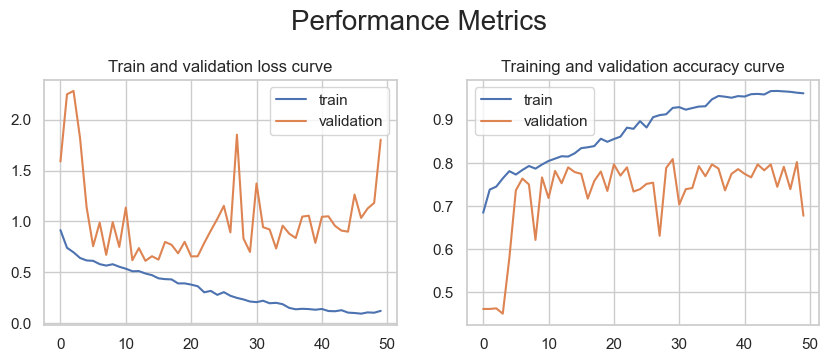

In [ ]:
plot_result(history2)

# Ensembling

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Alexnet\Alexnet-49--0.733698.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Resnet\Resnet-49--0.960055.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
ensemble_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [ ]:
history_ene=ensemble_model.fit(
train_generator,
validation_data=valid_generator,epochs=10)

Epoch 1/10
184/184 [==============================] - 1097s 6s/step - loss: 0.2070 - accuracy: 0.9327 - val_loss: 1.2454 - val_accuracy: 0.7719
Epoch 2/10
184/184 [==============================] - 1077s 6s/step - loss: 0.1520 - accuracy: 0.9502 - val_loss: 0.9498 - val_accuracy: 0.7705
Epoch 3/10
184/184 [==============================] - 1075s 6s/step - loss: 0.1474 - accuracy: 0.9512 - val_loss: 1.0297 - val_accuracy: 0.7883
Epoch 4/10
184/184 [==============================] - 1077s 6s/step - loss: 0.1109 - accuracy: 0.9628 - val_loss: 1.1620 - val_accuracy: 0.7910
Epoch 5/10
184/184 [==============================] - 1075s 6s/step - loss: 0.1451 - accuracy: 0.9536 - val_loss: 1.2621 - val_accuracy: 0.7609
Epoch 6/10
184/184 [==============================] - 1077s 6s/step - loss: 0.1192 - accuracy: 0.9546 - val_loss: 1.1666 - val_accuracy: 0.7842
Epoch 7/10
184/184 [==============================] - 1079s 6s/step - loss: 0.1227 - accuracy: 0.9601 - val_loss: 0.9628 - val_accuracy:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory = "C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/Diabetic retinopathy Detection/train_images/",
        x_col="id_code",
        target_size=(224, 224),
        batch_size=1,
        shuffle=False,
        class_mode=None)

Found 3661 validated image filenames.


In [ ]:
history_ene.history

{'loss': [0.20697979629039764,
  0.1520242989063263,
  0.14743119478225708,
  0.11094193160533905,
  0.14508190751075745,
  0.11919110268354416,
  0.12267159670591354,
  0.11940706521272659,
  0.13341695070266724,
  0.09965105354785919],
 'accuracy': [0.9327415227890015,
  0.950153648853302,
  0.9511778950691223,
  0.9627859592437744,
  0.9535677433013916,
  0.9545919895172119,
  0.9600546360015869,
  0.9590303897857666,
  0.9549334049224854,
  0.9658586382865906],
 'val_loss': [1.2453950643539429,
  0.949757993221283,
  1.029732584953308,
  1.1620146036148071,
  1.2621103525161743,
  1.166579246520996,
  0.9628159999847412,
  1.2565481662750244,
  1.1621952056884766,
  1.1112672090530396],
 'val_accuracy': [0.7718579173088074,
  0.7704917788505554,
  0.7882513403892517,
  0.7909836173057556,
  0.7609289884567261,
  0.7841529846191406,
  0.7827869057655334,
  0.7704917788505554,
  0.7882513403892517,
  0.7909836173057556]}

In [ ]:
# Function to plot the performance metrics
def plot_result(hist):
    plt.figure(figsize=(10, 7));
    plt.suptitle(f"Performance Metrics", fontsize=20)

    # Actual and validation losses
    plt.subplot(2, 2, 1);
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.title('Train and validation loss curve')
    plt.legend()

    # Actual and validation accuracy
    plt.subplot(2, 2, 2);
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='validation')
    plt.title('Training and validation accuracy curve')
    plt.legend()



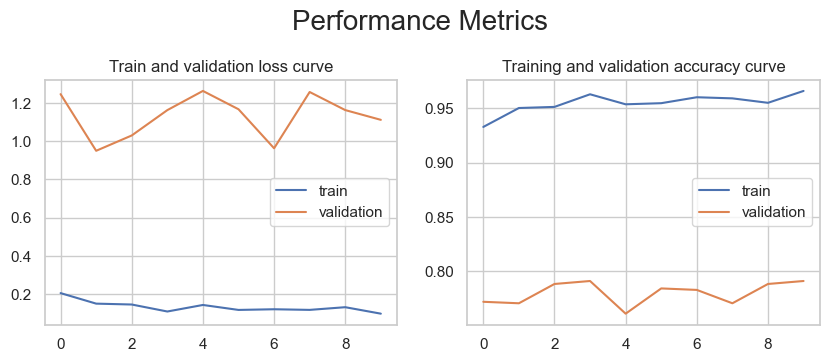

In [ ]:
plot_result(history_ene)

In [ ]:
from keras.models import Model
from keras.models import Sequential,load_model
STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = ensemble_model.predict(complete_generator, steps=STEP_SIZE_COMPLETE)
train_preds = [np.argmax(pred) for pred in train_preds]

3661/3661 [==============================] - 439s 120ms/step


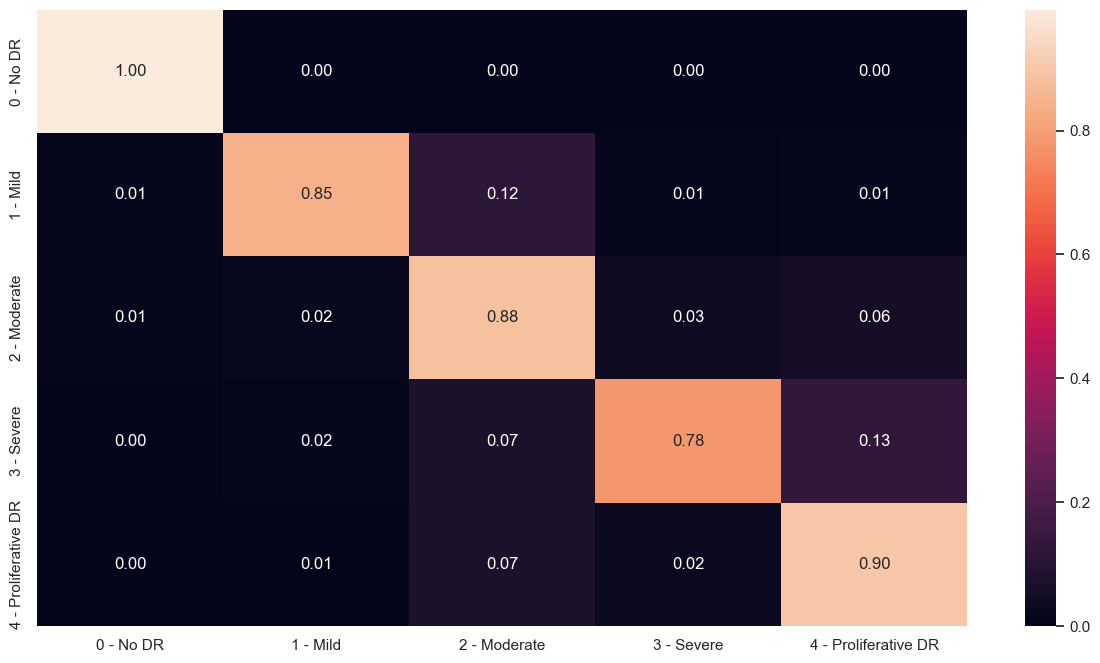

In [ ]:
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
cnf_matrix = confusion_matrix(df_train['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
#print(df_cm.describe().T)
plt.figure(figsize=(15, 8))
sns.heatmap(df_cm, annot=True, fmt='.2f')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
print('Precision: %.3f' % precision_score(df_train['diagnosis'].astype('int'), train_preds,average='macro'))


print('Recall: %.3f' % recall_score(df_train['diagnosis'].astype('int'), train_preds,average='macro'))



print('F1 Score: %.3f' % f1_score(df_train['diagnosis'].astype('int'), train_preds,average='macro'))




Precision: 0.872
Recall: 0.881
F1 Score: 0.875


In [ ]:
print('Accuracy: %.3f' % accuracy_score(df_train['diagnosis'].astype('int'), train_preds))


Accuracy: 0.931


In [ ]:
test_generator.reset()
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
preds = ensemble_model.predict(test_generator, steps=STEP_SIZE_TEST)
predictions = [np.argmax(pred) for pred in preds]
predictions[:10]

120/120 [==============================] - 127s 1s/step


[3, 4, 3, 4, 2, 4, 1, 3, 2, 4]

In [ ]:
filenames = test_generator.filenames
results = pd.DataFrame(['id_code',filenames, 'diagnosis',predictions])
results.to_csv('C:/Users/Vansh/Desktop/Diabetic retinopathy Detection/ENSEMBLE_PRED.csv',index=False)
results.head(5).T

,0,1,2,3
0,id_code,"[003f0afdcd15.png, 006efc72b638.png, 00836aaac...",diagnosis,"[3, 4, 3, 4, 2, 4, 1, 3, 2, 4, 3, 3, 2, 1, 2, ..."
